## Crop and Fertilizer Recommendation System Using ML

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loding the Dataset
crop= pd.read_csv("dataset/Crop_recommendation.csv")

In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
crop.shape

(2200, 8)

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
# to check for missing values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# to check for duplicate values
crop.duplicated().sum() 

np.int64(0)

In [10]:
# to check statistical summary
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
# Check target variable distribution
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

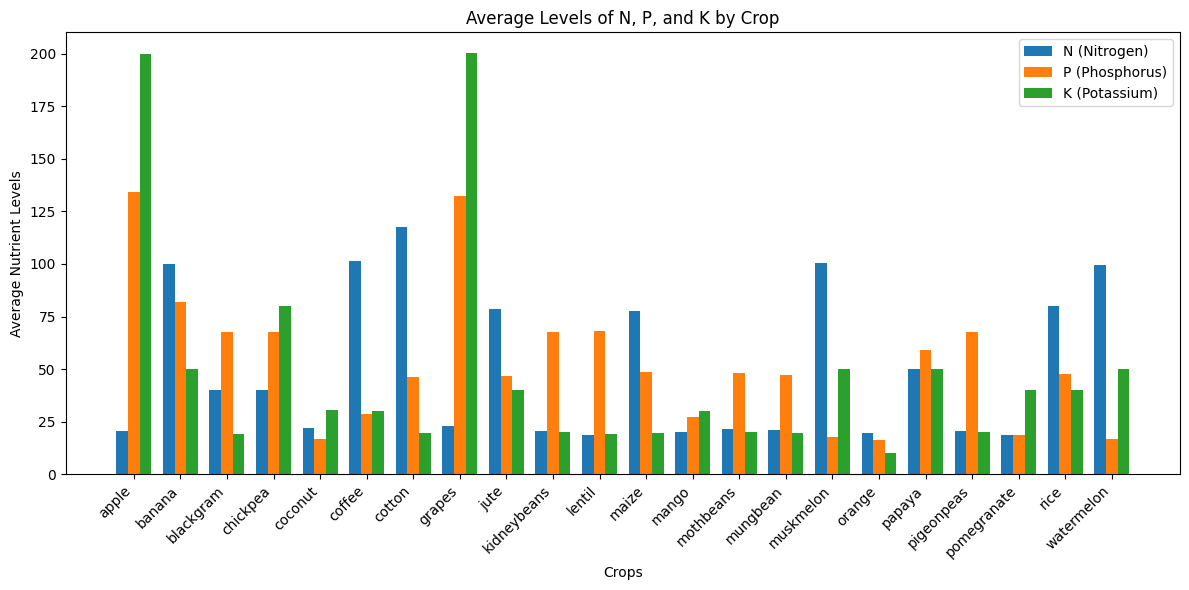

In [13]:
grouped_data = crop.groupby('label')[['N', 'P', 'K']].mean()

# Get the labels (crop types) and nutrient values
labels = grouped_data.index
N_values = grouped_data['N']
P_values = grouped_data['P']
K_values = grouped_data['K']

# Set up the bar chart parameters
x = np.arange(len(labels))  # The label locations
width = 0.25  # The width of the bars

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Add bars for each nutrient
d1 = ax.bar(x - width, N_values, width, label='N (Nitrogen)')
d2 = ax.bar(x, P_values, width, label='P (Phosphorus)')
d3 = ax.bar(x + width, K_values, width, label='K (Potassium)')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Crops')
ax.set_ylabel('Average Nutrient Levels')
ax.set_title('Average Levels of N, P, and K by Crop')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4020\1582953511.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


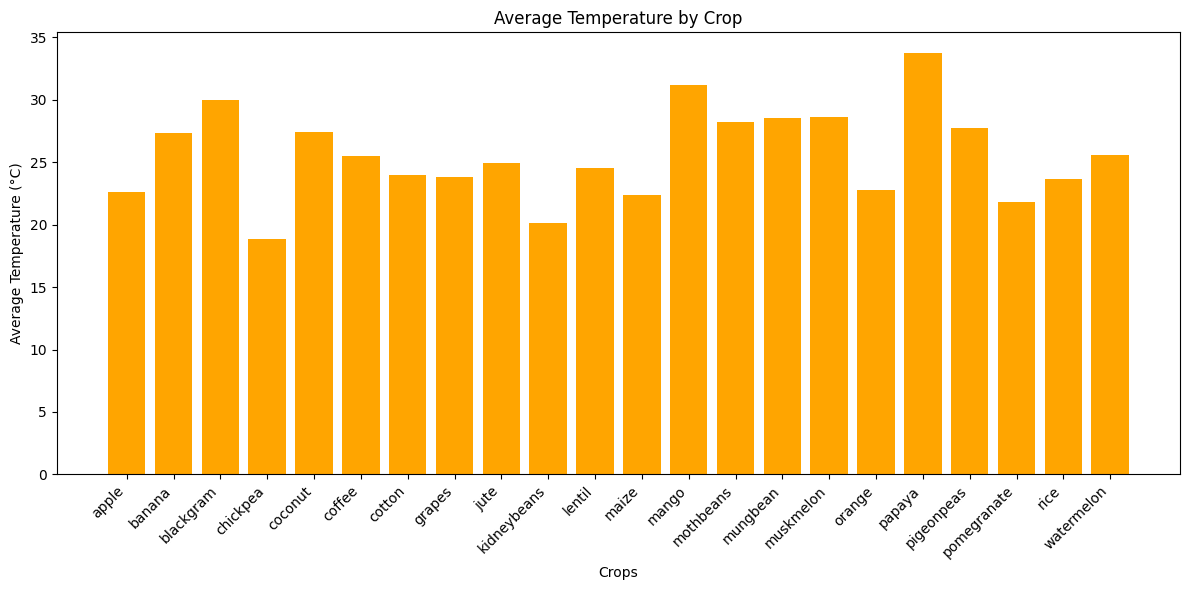

C:\Users\USER\AppData\Local\Temp\ipykernel_4020\1582953511.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


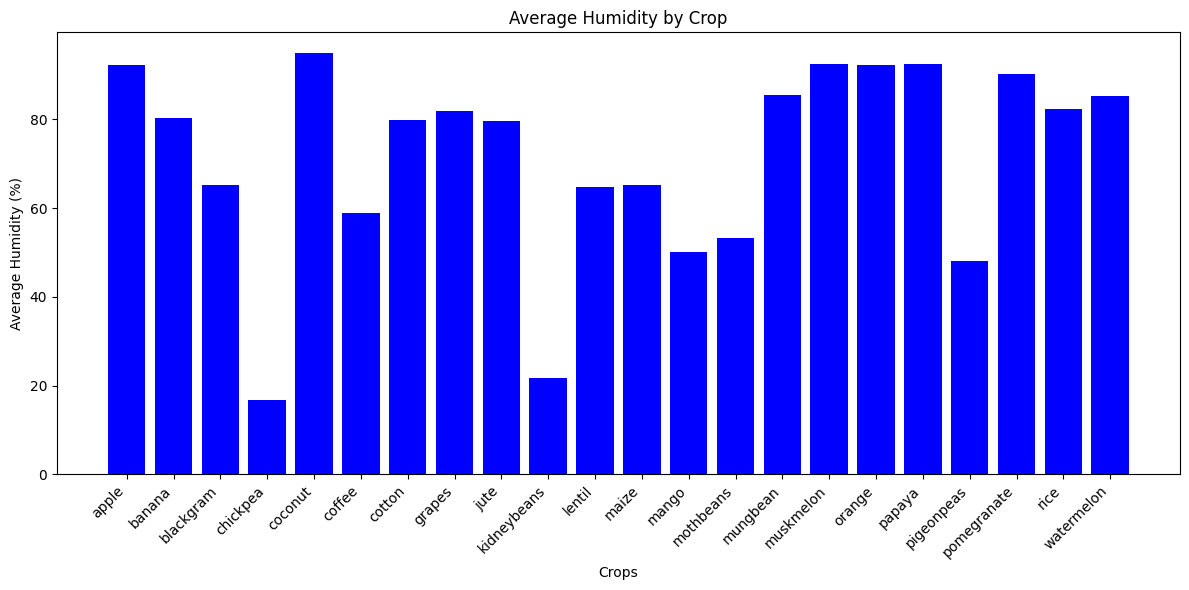

C:\Users\USER\AppData\Local\Temp\ipykernel_4020\1582953511.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


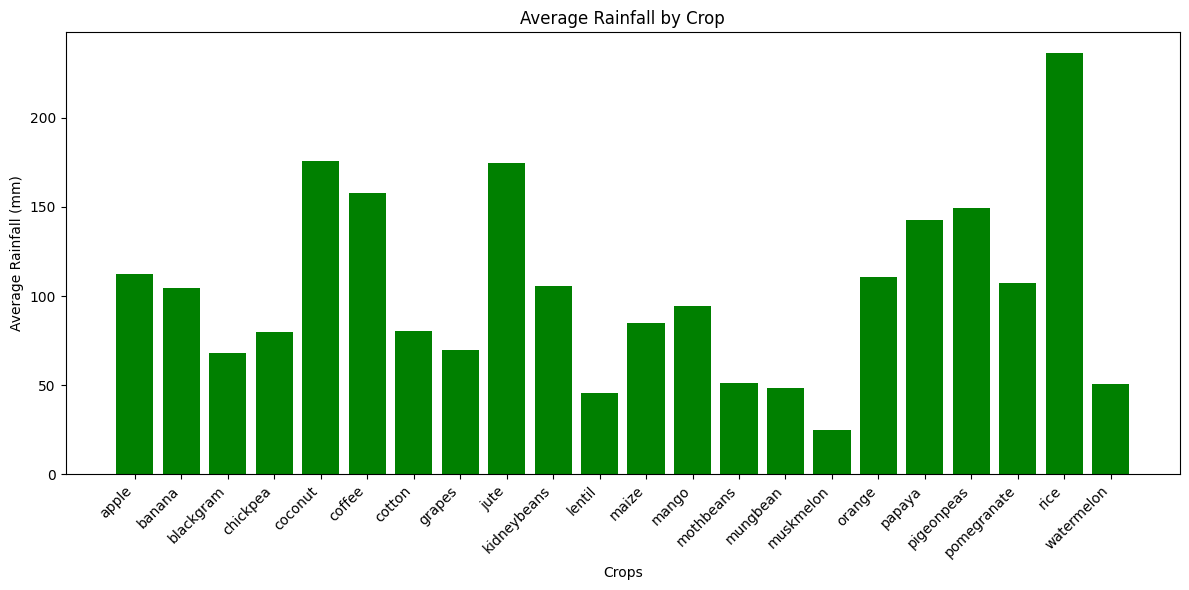

In [14]:
# Group the data by 'label' and calculate the mean for temperature, humidity, and rainfall
grouped_climate = crop.groupby('label')[['temperature', 'humidity', 'rainfall']].mean()

# Temperature graph
fig, ax = plt.subplots(figsize=(12, 6))
temperature_values = grouped_climate['temperature']
ax.bar(labels, temperature_values, color='orange')
ax.set_xlabel('Crops')
ax.set_ylabel('Average Temperature (°C)')
ax.set_title('Average Temperature by Crop')
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Humidity graph
fig, ax = plt.subplots(figsize=(12, 6))
humidity_values = grouped_climate['humidity']
ax.bar(labels, humidity_values, color='blue')
ax.set_xlabel('Crops')
ax.set_ylabel('Average Humidity (%)')
ax.set_title('Average Humidity by Crop')
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Rainfall graph
fig, ax = plt.subplots(figsize=(12, 6))
rainfall_values = grouped_climate['rainfall']
ax.bar(labels, rainfall_values, color='green')
ax.set_xlabel('Crops')
ax.set_ylabel('Average Rainfall (mm)')
ax.set_title('Average Rainfall by Crop')
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

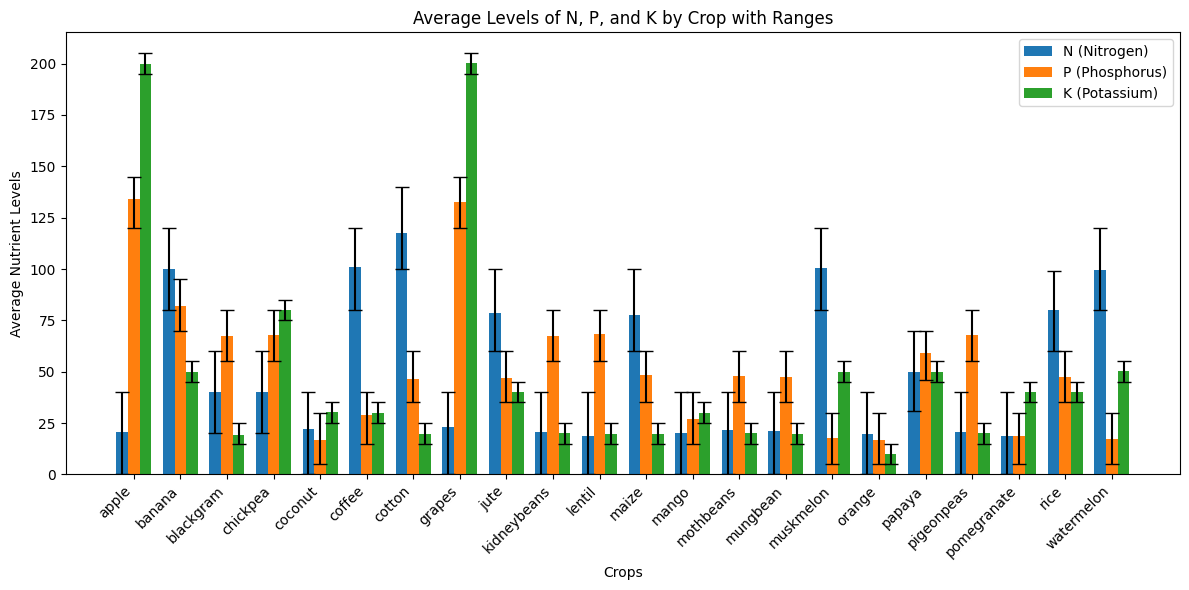

C:\Users\USER\AppData\Local\Temp\ipykernel_4020\1423866127.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


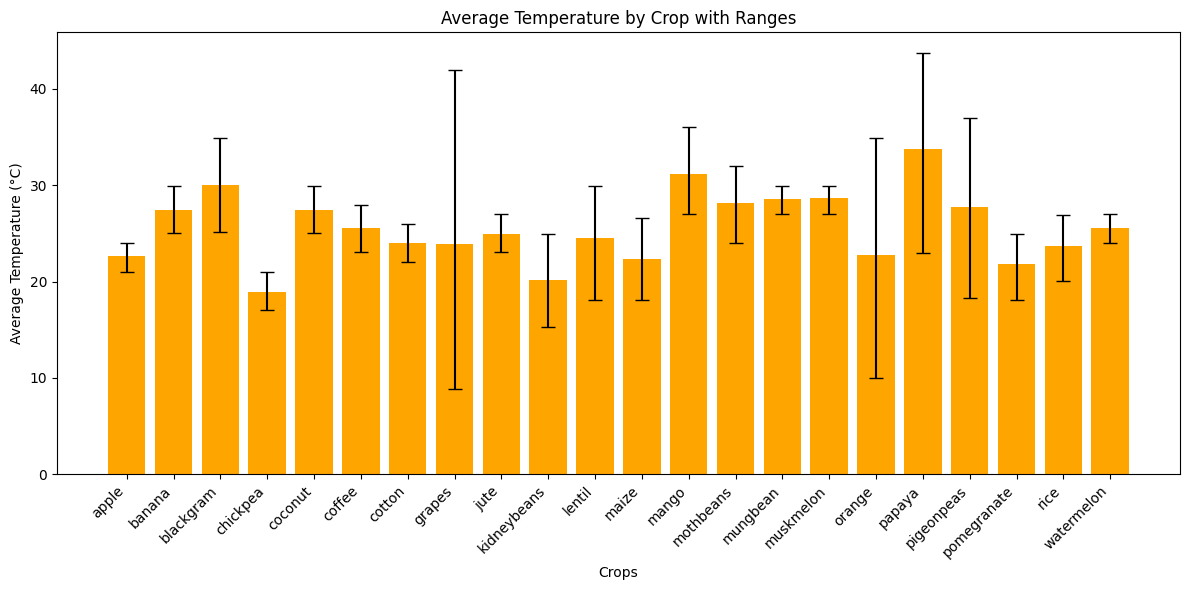

C:\Users\USER\AppData\Local\Temp\ipykernel_4020\1423866127.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


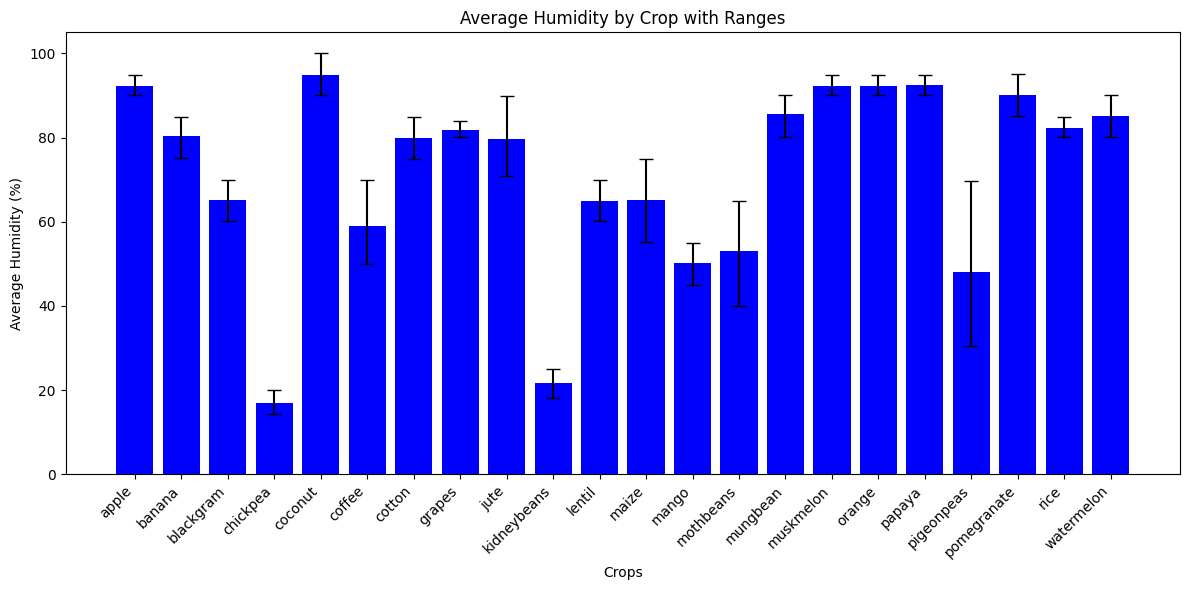

C:\Users\USER\AppData\Local\Temp\ipykernel_4020\1423866127.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


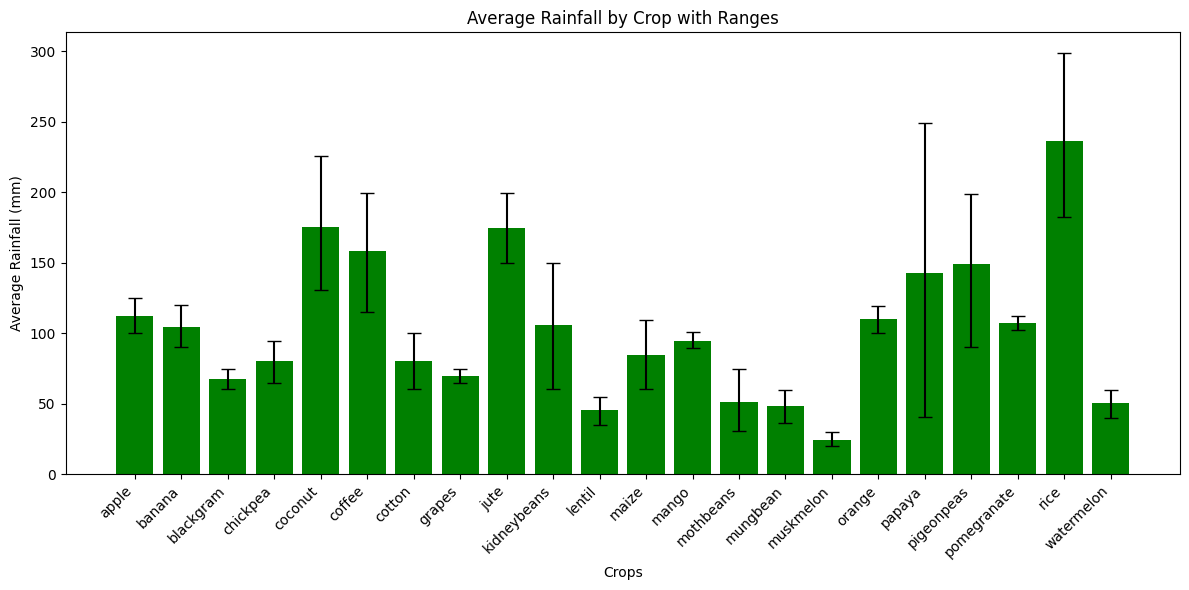

In [15]:
# Group the data by 'label' and calculate the mean and range for N, P, and K
grouped_data = crop.groupby('label')[['N', 'P', 'K']].agg(['mean', 'min', 'max'])

# Get the labels (crop types) and nutrient values
labels = grouped_data.index
N_mean = grouped_data[('N', 'mean')]
N_min = grouped_data[('N', 'min')]
N_max = grouped_data[('N', 'max')]
P_mean = grouped_data[('P', 'mean')]
P_min = grouped_data[('P', 'min')]
P_max = grouped_data[('P', 'max')]
K_mean = grouped_data[('K', 'mean')]
K_min = grouped_data[('K', 'min')]
K_max = grouped_data[('K', 'max')]

# Set up the bar chart parameters
x = np.arange(len(labels))  # The label locations
width = 0.25  # The width of the bars

# Create the figure and axes for N, P, and K range bar charts
fig, ax = plt.subplots(figsize=(12, 6))

# Add bars for each nutrient range
d1 = ax.bar(x - width, N_mean, width, label='N (Nitrogen)', yerr=[N_mean - N_min, N_max - N_mean], capsize=5)
d2 = ax.bar(x, P_mean, width, label='P (Phosphorus)', yerr=[P_mean - P_min, P_max - P_mean], capsize=5)
d3 = ax.bar(x + width, K_mean, width, label='K (Potassium)', yerr=[K_mean - K_min, K_max - K_mean], capsize=5)

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Crops')
ax.set_ylabel('Average Nutrient Levels')
ax.set_title('Average Levels of N, P, and K by Crop with Ranges')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Group the data by 'label' and calculate the mean and range for temperature, humidity, and rainfall
grouped_climate = crop.groupby('label')[['temperature', 'humidity', 'rainfall']].agg(['mean', 'min', 'max'])

# Temperature range bar chart
fig, ax = plt.subplots(figsize=(12, 6))
temperature_mean = grouped_climate[('temperature', 'mean')]
temperature_min = grouped_climate[('temperature', 'min')]
temperature_max = grouped_climate[('temperature', 'max')]
ax.bar(labels, temperature_mean, yerr=[temperature_mean - temperature_min, temperature_max - temperature_mean], capsize=5, color='orange')
ax.set_xlabel('Crops')
ax.set_ylabel('Average Temperature (°C)')
ax.set_title('Average Temperature by Crop with Ranges')
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Humidity range bar chart
fig, ax = plt.subplots(figsize=(12, 6))
humidity_mean = grouped_climate[('humidity', 'mean')]
humidity_min = grouped_climate[('humidity', 'min')]
humidity_max = grouped_climate[('humidity', 'max')]
ax.bar(labels, humidity_mean, yerr=[humidity_mean - humidity_min, humidity_max - humidity_mean], capsize=5, color='blue')
ax.set_xlabel('Crops')
ax.set_ylabel('Average Humidity (%)')
ax.set_title('Average Humidity by Crop with Ranges')
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Rainfall range bar chart
fig, ax = plt.subplots(figsize=(12, 6))
rainfall_mean = grouped_climate[('rainfall', 'mean')]
rainfall_min = grouped_climate[('rainfall', 'min')]
rainfall_max = grouped_climate[('rainfall', 'max')]
ax.bar(labels, rainfall_mean, yerr=[rainfall_mean - rainfall_min, rainfall_max - rainfall_mean], capsize=5, color='green')
ax.set_xlabel('Crops')
ax.set_ylabel('Average Rainfall (mm)')
ax.set_title('Average Rainfall by Crop with Ranges')
ax.set_xticklabels(labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()